In [30]:
import quandl
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [2]:
TSLA = quandl.get("WIKI/TSLA")

In [10]:
forecast_len=90
TSLA['Predicted'] = TSLA[['Adj. Close']].shift(-forecast_len)
print(TSLA.tail())

              Open    High     Low   Close      Volume  Ex-Dividend  \
Date                                                                  
2018-03-21  310.25  322.44  310.19  316.53   5927881.0          0.0   
2018-03-22  313.89  318.82  308.18  309.10   4914307.0          0.0   
2018-03-23  311.25  311.61  300.45  301.54   6600538.0          0.0   
2018-03-26  307.34  307.59  291.36  304.18   8324639.0          0.0   
2018-03-27  304.00  304.27  277.18  279.18  13696168.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2018-03-21          1.0     310.25     322.44    310.19      316.53   
2018-03-22          1.0     313.89     318.82    308.18      309.10   
2018-03-23          1.0     311.25     311.61    300.45      301.54   
2018-03-26          1.0     307.34     307.59    291.36      304.18   
2018-03-27          1.0     304.00     304.27    277.18      279.18   

    

In [17]:
#create testing data
x = np.array(TSLA.drop(['Predicted'],1))
x = x[:-forecast_len]
y = np.array(TSLA['Predicted'])
y = y[:-forecast_len]

In [20]:
#split data
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size =0.25)

In [24]:
#Model and print
svr_rbf= SVR(kernel = 'rbf', C= 1e3, gamma = 0.1)
svr_rbf.fit(x_train, y_train)
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
svr_rbf_confidence=svr_rbf.score(x_test,y_test)
print(f"SVR Confidence: {round(svr_rbf_confidence*100,2)}%")

SVR Confidence: 0.33%


In [29]:
#linear model
linear = LinearRegression()
linear.fit(x_train, y_train)
linear_confident = linear.score(x_test, y_test)
print(f"Linear Regression Confidence: {round(linear_confident*100,2)}%")

Linear Regression Confidence: 87.79%


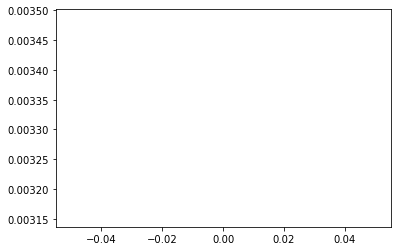